## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2023  1992.424394              NaN
1     Afghanistan  2022  1981.710168              NaN
2     Afghanistan  2021  2144.166570              NaN
3     Afghanistan  2020  2769.685745              NaN
4     Afghanistan  2019  2927.245144              NaN


In [4]:
print(gdp_df.tail(5))

     Country or Area  Year        Value  Value Footnotes
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB
None


In [6]:
print(gdp_df.shape)

(8219, 4)


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [8]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Year': 'Year', 'Value' : 'GDP_Per_Capita'})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

247 unique countries and 34 unique years

In [9]:
unique_years = gdp_df['Year'].nunique()

print(unique_years)

34


In [10]:
countries_years = gdp_df.groupby('Country')['Year'].nunique()

print(countries_years)

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64


In [11]:
countries_with_all_years = countries_years[countries_years == unique_years]

print(countries_with_all_years)

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64


228 countries with all years

In [12]:
countries_missing_years = countries_years[countries_years < unique_years]

print(countries_missing_years)

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64


In [13]:
gdp_observations_per_year=gdp_df.groupby('Year').count()

print(gdp_observations_per_year)

      Country  GDP_Per_Capita
Year                         
1990      233             233
1991      234             234
1992      234             234
1993      234             234
1994      235             235
1995      236             236
1996      236             236
1997      238             238
1998      238             238
1999      238             238
2000      240             240
2001      240             240
2002      241             241
2003      241             241
2004      241             241
2005      241             241
2006      242             242
2007      242             242
2008      244             244
2009      245             245
2010      245             245
2011      246             246
2012      246             246
2013      247             247
2014      247             247
2015      247             247
2016      247             247
2017      247             247
2018      247             247
2019      247             247
2020      247             247
2021      

".count()" counts non-NaN values in each column, not the rows themselves. So, it will give you the count of non-null values in each column for every group.
It returns one count per column that exists in the group (after grouping), so if you have 3 columns (Country, Year, GDP_Per_Capita), you will get 3 counts: one for each column (i.e., it will tell you how many non-NaN values exist in each of these columns for each group).

In [14]:
gdp_observations_per_year=gdp_df.groupby('Year').size()

print(gdp_observations_per_year)

Year
1990    233
1991    234
1992    234
1993    234
1994    235
1995    236
1996    236
1997    238
1998    238
1999    238
2000    240
2001    240
2002    241
2003    241
2004    241
2005    241
2006    242
2007    242
2008    244
2009    245
2010    245
2011    246
2012    246
2013    247
2014    247
2015    247
2016    247
2017    247
2018    247
2019    247
2020    247
2021    247
2022    246
2023    240
dtype: int64


".size()" counts all rows in each group, regardless of whether the values are missing (NaN) or not.
It doesn't care about the individual columns in your DataFrame. Instead, it simply counts how many rows (or observations) there are for each group.
The result of .size() is a single column containing the row count for each group, as it’s focused on the number of rows rather than column-specific data.

Look at the number of observations per year. What do you notice?
It looks like 2013 - 2021 have the most consistant volume of data. With the count of entries being 247 across those years. 

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Histogram ".hist()"

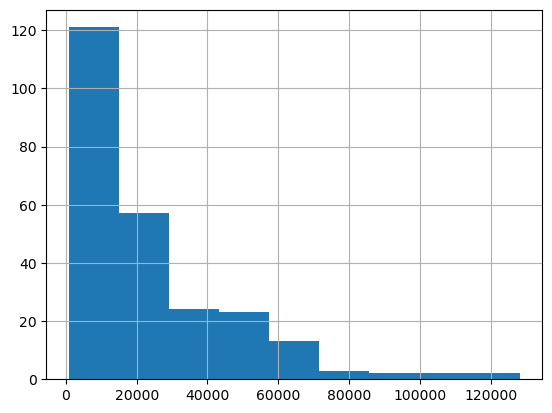

In [15]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].hist(bins=9)

plt.show()

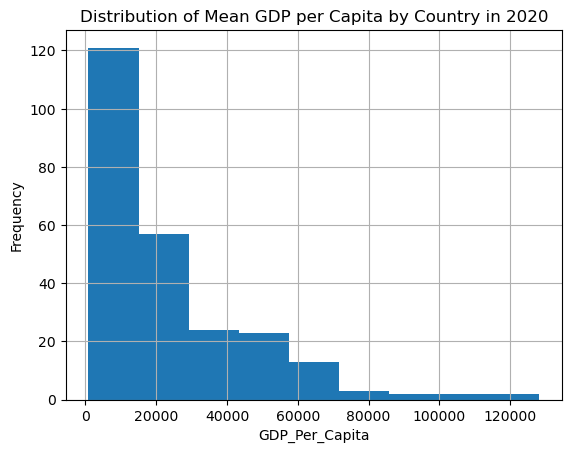

In [16]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

gdp_2020_country = gdp_2020.groupby('Country')['GDP_Per_Capita'].mean()

gdp_2020_country.hist(bins=9)

plt.xlabel('GDP_Per_Capita')
plt.ylabel('Frequency')
plt.title('Distribution of Mean GDP per Capita by Country in 2020')

plt.show()

Grouping by country doesn't appear to change the histogram for 2020. 

Researched what bins were and the best way to determine the number of bins to use. 

Bins: Bins are essentially categories or intervals that divide the range of your data into smaller, non-overlapping segments. The height of each bar in the histogram corresponds to the number of data points that fall within that particular bin. Imagine you have a dataset of student ages. You could create bins like: 0-5, 6-10, 11-15, etc. Then, each bar in the histogram would represent the number of students within each age range. 

best way to determine the number of bins to use:  Square Root Rule or Sturges' Rule.
Square Root Rule:  Number of bins = ⌈√n⌉
32 bins with the square root rule having 247 data points in 2020

Used Sturges' Rule to determine the number of bins:
Sturges' Rule gives you the number of bins based on the size of your dataset. The formula is: Number of bins = 1 + log2(n)
9 bins using Sturges' Rule having 247 data points in 2020
- look up Step-by-Step Calculation for Sturges' Rule -

Density plot:
Is a way to represent the distribution of a dataset in a smooth curve, rather than a histogram, which is a stepped approximation. The KDE gives you a continuous curve that provides a better sense of the data’s underlying distribution.
Makes it easier to see the mean or median, the spread of the data, and the presence of any multimodal behavior (i.e., multiple peaks).
Helps in Comparing Distributions: KDE plots can also be useful when comparing the distributions of multiple variables or datasets in one plot (e.g., comparing two different years or two different groups). You can overlay multiple KDEs to understand how the distributions of different data sets compare.
It works by placing a small "bump" (kernel) at each data point and then summing the contributions of all the bumps to get a smooth curve.
shade: If True, fills the area under the KDE curve with the color specified. It's useful for emphasizing the area under the curve.
bw_adjust: This controls the bandwidth of the kernel. The bandwidth determines the smoothness of the curve. A smaller value results in a more sensitive curve (with more peaks), while a larger value results in a smoother curve.
vertical: If True, plots the KDE vertically.
legend: If True, includes a legend for multiple KDE plots.
fill: If True, fills the area under the curve.

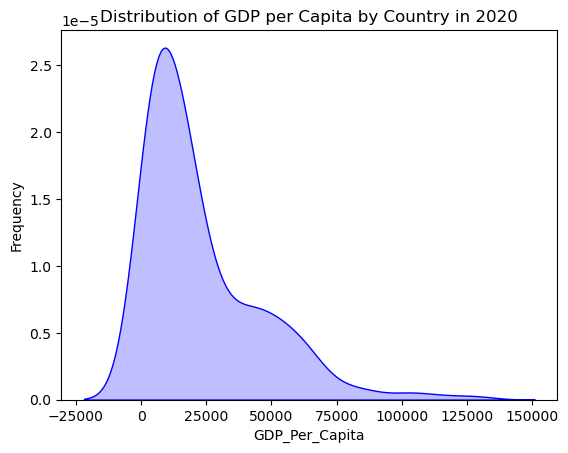

In [17]:
sns.kdeplot(gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'], color='blue', fill=True, bw_adjust=1)

plt.xlabel('GDP_Per_Capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita by Country in 2020')

plt.show()

Violin plot:

A violin plot is a visualization tool for understanding the distribution of a continuous variable across different categories (or groups). It combines aspects of both a box plot and a kernel density estimate (KDE) plot, making it highly informative.

A violin plot provides a smooth density curve. This curve shows you the full distribution of the data and can reveal insights like skewness, bimodal distributions, and outliers. Understand the underlying distribution of a dataset, not just summary statistics.

Compare the distribution of a continuous variable across multiple categories (e.g., comparing the income distribution across different regions).

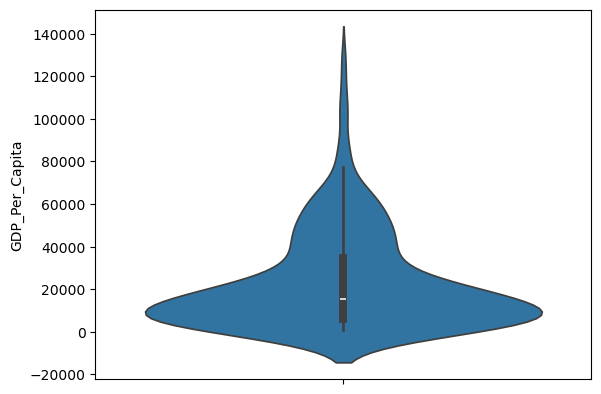

In [18]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

sns.violinplot(y="GDP_Per_Capita", data=gdp_2020)

plt.show()

9. What was the median GDP per capita value in 2020?

In [19]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

median_gdp_2020 = round(gdp_2020['GDP_Per_Capita'].median(),2)

print(median_gdp_2020)

15309.24


GDP per capita= Gross Domestic Product (GDP)/Population

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

The def keyword is used to define a function in Python. 

In [20]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

print(gdp_decades)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


A boxplot:
A box plot (also known as a box-and-whisker plot) is useful for:
Summarizing the distribution of a dataset.
Showing variability, spread, and outliers within a dataset.
Comparing distributions of numeric data across categories.

Use a box plot when:
You want to compare distributions of a numeric variable across different categories.
You want to show the range (min to max), median, quartiles, and identify any outliers in your data.

What a box plot shows:
The box represents the interquartile range (IQR), which contains the middle 50% of the data.
The line inside the box shows the median value of the data.
The whiskers show the range of the data (typically 1.5 * IQR above and below the box).
Points outside the whiskers are considered outliers.

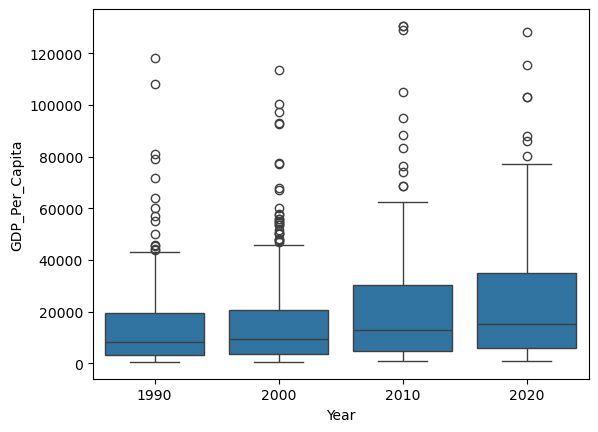

In [21]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], data=gdp_decades)

plt.show()

A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn):

A bar plot (also known as a bar chart) is ideal when you want to:
Compare categorical data across different groups.
Visualize the frequency or aggregate values (such as sums, averages, or counts) for different categories.

Use a bar plot when:
You have categorical variables.
You want to compare values of a numeric variable across different categories.
The categories are discrete.
The height of each bar represents the valuefor each category.

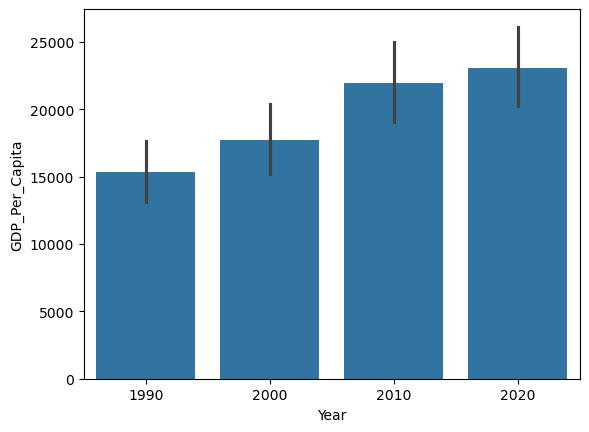

In [22]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], data=gdp_decades)

plt.show()

A scatterplot:

Best used when:
You want to explore the relationship between two numeric variables.
You want to visualize if there’s a correlation or trend between two variables (e.g., height vs. weight, age vs. salary).

Use a scatter plot when:
You have two continuous numeric variables and want to examine the relationship between them.
You want to check if there's a linear or non-linear relationship between the two variables.

What a scatter plot shows:
Each point represents an observation in your data.
The x-axis and y-axis represent the two variables you're comparing.
You can visually assess the strength of the relationship between the two variables, look for patterns, and spot any outliers.


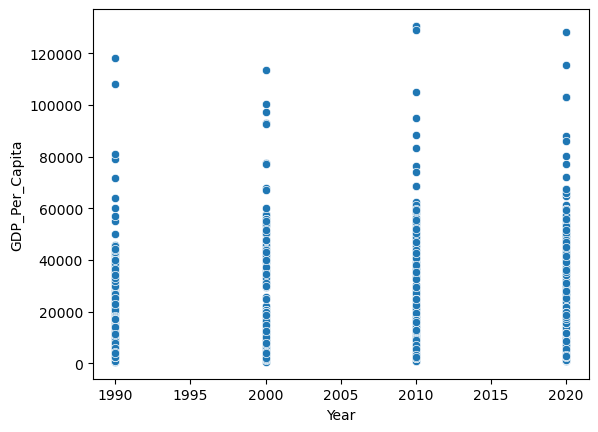

In [23]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], data=gdp_decades)

plt.show()

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn):
Using a scatter plot with a trend line (also called a line of best fit) is beneficial when you want to visualize and quantify the relationship between two continuous variables. The trend line helps you identify patterns and correlations more easily, and it provides additional insight that may not be obvious from the raw data points alone.
Trend line: By overlaying a trend line, you can more easily see whether there's a linear or non-linear relationship between the two variables. The trend line makes the overall pattern more apparent, helping you determine if the data points are following a specific direction or if there’s a strong correlation.

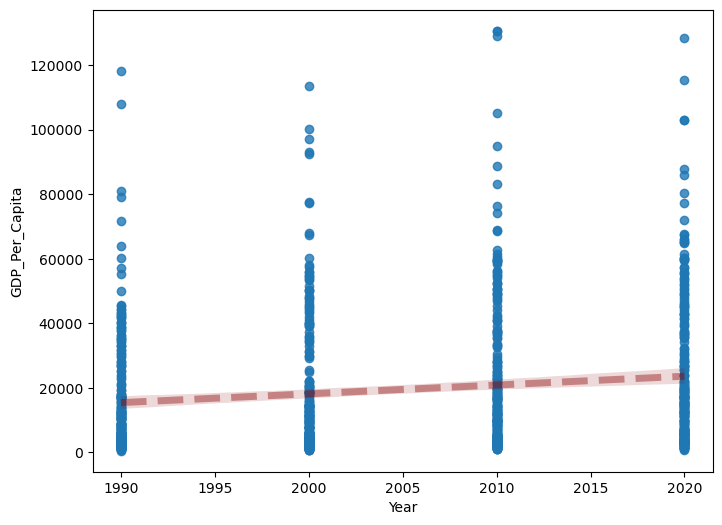

In [24]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
   line_kws={
        "color": "darkred",
        "alpha": 0.4,
        "lw": 5,
        "ls": "--"
    },
    ax=ax
)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

Filter rows for only 100k 'GDP_Per_Capita'

gdp_above_100k= gdp_df[gdp_df['GDP_Per_Capita']>100000]

How to sort: .sort_values()
sort_index(): This method sorts a DataFrame by its index (row labels)
sort_values(): This method sorts a DataFrame by one or more values in one or more columns.

gdp_above_100k_sorted=gdp_above_100k.sort_values(by='Year', ascending=True)

What to use to get only the first row:

.loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found.

.iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). Access by Integer Position.

Syntax:
df.iloc[row_index, column_index]

Select a single row:
.iloc[0]

Sleect a single column: 
df.iloc[:, 1]

first_country = gdp_above_100k_sorted.iloc[0]

In [25]:
gdp_above_100k= gdp_df[gdp_df['GDP_Per_Capita']>100000]

gdp_above_100k_sorted=gdp_above_100k.sort_values(by='Year', ascending=True)

first_country = gdp_above_100k_sorted.iloc[0]

print(first_country)

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           108057.042464
Name: 7827, dtype: object


gdp_above_100k= gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values(by='Year', ascending=True).iloc[0]

print(gdp_above_100k)

print(gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values(by='Year', ascending=True).iloc[0])

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Filter for 'Year' 2020

gdp_2020=gdp_df[gdp_df['Year']==2020]

sort

In [27]:
gdp_2020=gdp_df[gdp_df['Year']==2020].sort_values(by='GDP_Per_Capita', ascending=False).iloc[0]

print(gdp_2020)

Country              Luxembourg
Year                       2020
GDP_Per_Capita    128256.560341
Name: 4426, dtype: object


".max()" vs ".sort_values()"

Max appears to be more efficient
For finding the highest value in a list, using the max() function is more efficient than sorting the list. 
The max() function has a time complexity of O(n), meaning it iterates through the list once. Sorting the list, typically with a time complexity of O(n log n), takes longer, especially for larger lists. Therefore, max() is the preferred method for finding the single highest value.

In [28]:
gdp_2020=gdp_df[gdp_df['Year']==2020]

country_highest_GDP_2020= gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].max()]

print (country_highest_GDP_2020)

         Country  Year  GDP_Per_Capita
4426  Luxembourg  2020   128256.560341


Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

When you want to visualize how something has changed over time, a line plot is typically the best choice. Line plots are particularly effective for showing trends and changes in data over continuous periods, like time.

Syntax: plt.plot( 'xvalues', 'yvalues', data=df)
plt.xlim() to adjust the range shown
Labels:
plt.title()
plt.xlabel()
plt.ylabel()

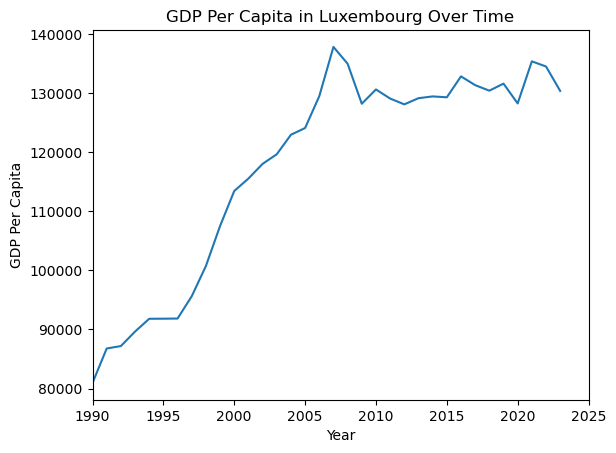

In [29]:
luxembourg_data = gdp_df[gdp_df['Country'] == "Luxembourg"]

plt.plot(luxembourg_data['Year'],luxembourg_data['GDP_Per_Capita'], data=luxembourg_data)

plt.title('GDP Per Capita in Luxembourg Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xlim(1990, 2025)

plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [30]:
gdp_2020=gdp_df[gdp_df['Year']==2020]

country_lowest_GDP_2020= gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].min()]

print (country_lowest_GDP_2020)

      Country  Year  GDP_Per_Capita
1046  Burundi  2020      833.920257


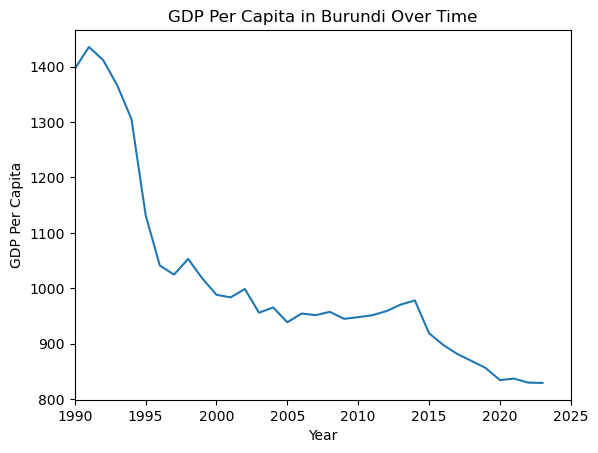

In [31]:
burundi_data = gdp_df[gdp_df['Country'] == "Burundi"]

plt.plot(burundi_data['Year'],burundi_data['GDP_Per_Capita'], data=burundi_data)

plt.title('GDP Per Capita in Burundi Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xlim(1990, 2025)

plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [32]:
internet_df=pd.read_csv('../data/internet_use.csv',nrows=6083)

 if you are reading in python packages you will want to do that at the top to know what all packages you have running in your notebook

In [34]:
print(internet_df.head())

  Country or Area  Year  Value Value Footnotes
0     Afghanistan  2019  17.60               1
1     Afghanistan  2018  16.80               2
2     Afghanistan  2017  13.50               3
3     Afghanistan  2016  11.00               4
4     Afghanistan  2015   8.26               4


In [33]:
print(internet_df.tail())

     Country or Area  Year     Value Value Footnotes
6078        Zimbabwe  1997  0.033080             NaN
6079        Zimbabwe  1996  0.016790             NaN
6080        Zimbabwe  1995  0.007684             NaN
6081        Zimbabwe  1994  0.001739             NaN
6082        Zimbabwe  1990  0.000000             NaN


headerint, Sequence of int, ‘infer’ or None, default ‘infer’
nrowsint, optional
Number of rows of file to read. Useful for reading pieces of large files.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [35]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

print(internet_df.head())

  Country or Area  Year  Value
0     Afghanistan  2019  17.60
1     Afghanistan  2018  16.80
2     Afghanistan  2017  13.50
3     Afghanistan  2016  11.00
4     Afghanistan  2015   8.26


In [36]:
internet_df = internet_df.rename(columns={'Country or Area' : 'Country', 'Year': 'Year', 'Value' : 'Internet_Users_Pct'})

print(internet_df.head())                                 

       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [37]:
internet_observations_per_year=internet_df.groupby('Year').size()

print(internet_observations_per_year)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
dtype: int64


17. What is the first year to have a non-zero internet users percentage value?

In [38]:
internet_above_zero=internet_df[internet_df['Internet_Users_Pct']>0].sort_values('Year').iloc[0]

print(internet_above_zero)

Country                Denmark
Year                      1990
Internet_Users_Pct    0.097277
Name: 1570, dtype: object


In [39]:
internet_above_zero=internet_df[internet_df['Internet_Users_Pct']>0]

first_internet_above_zero=internet_above_zero['Year'].min()

print(first_internet_above_zero)

1990


internet_above_zero=internet_df[internet_df['Internet_Users_Pct']>=1].sort_values('Year').iloc[0]

print(internet_above_zero)

internet_above_zero=internet_df[internet_df['Internet_Users_Pct']>=1]

first_internet_above_zero=internet_above_zero['Year'].min()

print(first_internet_above_zero)

18. How does the distribution of internet users percent differ for 2000 and 2014?

<function matplotlib.pyplot.show(close=None, block=None)>

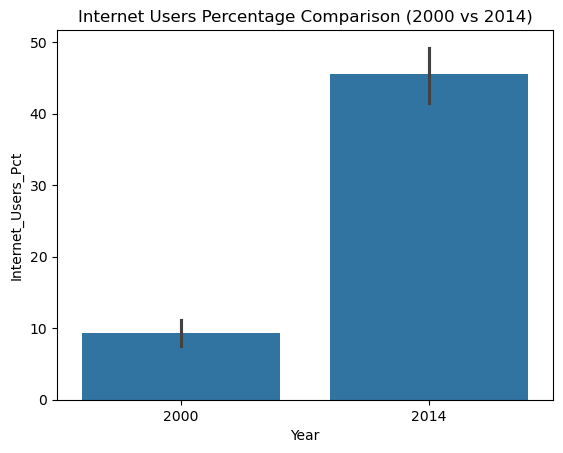

In [40]:
internet_users=internet_df[internet_df['Year'].isin([2000, 2014])]

sns.barplot(x=internet_users['Year'], y=internet_users['Internet_Users_Pct'], data=internet_users)

plt.title('Internet Users Percentage Comparison (2000 vs 2014)')
plt.xlabel('Year')
plt.ylabel('Internet_Users_Pct')

plt.show

19. For how many countries was the percentage of internet users below 5% in 2014?

In [41]:
internet_users_2014=internet_df[internet_df['Year']==2014]

internet_users_2014_above_5=internet_users_2014[internet_users_2014['Internet_Users_Pct']>5]

total_countries_above_5=internet_users_2014_above_5['Country'].nunique()

print(total_countries_above_5)

194


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

merge() function, which allows you to combine two DataFrames based on a common column (or index).
pd.merge(df1, df2, on='Key')
Inner Join (default): Only includes rows with matching keys in both DataFrames.
pd.merge(df1, df2, on='Key', how='inner')
Left Join: Includes all rows from the left DataFrame and matching rows from the right DataFrame. If there's no match, NaN values are used for the missing values from the right DataFrame.
merged_df = pd.merge(df1, df2, on='Key', how='left')
Right Join: Includes all rows from the right DataFrame and matching rows from the left DataFrame. If there's no match, NaN values are used for the missing values from the left DataFrame.
merged_df = pd.merge(df1, df2, on='Key', how='right')
Outer Join: Includes all rows from both DataFrames, with NaN values where there is no match.
merged_df = pd.merge(df1, df2, on='Key', how='outer')

In [42]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [43]:
print(gdp_and_internet_use.head())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  1990             NaN            0.000000
1  Afghanistan  2000     1617.826475                 NaN
2  Afghanistan  2001     1454.110782            0.004723
3  Afghanistan  2002     1774.308743            0.004561
4  Afghanistan  2003     1815.928200            0.087891


In [44]:
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
9494  Zimbabwe  2019     3294.806084             26.5883
9495  Zimbabwe  2020     2987.269823             29.2986
9496  Zimbabwe  2021     3184.785451             32.4616
9497  Zimbabwe  2022     3323.121932             32.5615
9498  Zimbabwe  2023     3442.251327                 NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Find the three countries with the highest internet users percentage in 2014. 

In [60]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

gdp_and_internet_use_2014_top_3=gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending=False).iloc[0:3]

print(gdp_and_internet_use_2014_top_3)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800


There is a "NaN" value in the above. To drop the NaN value use ".dropna". Use "subset" to drop "NaN" values in specific columns. Ex: .dropna(subset=['A', 'B'])

# Drop rows with any NaN values
df_dropna_rows = df.dropna()

# Drop columns with any NaN values
df_dropna_columns = df.dropna(axis=1)

# Drop rows where all values are NaN
df_dropna_all = df.dropna(how='all')

# Drop rows with at least 2 non-NaN values
df_dropna_thresh = df.dropna(thresh=2)

In [61]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

gdp_and_internet_use_2014 = gdp_and_internet_use_2014.dropna(subset=['GDP_Per_Capita'])

gdp_and_internet_use_2014_top_3=gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending=False).iloc[0:3]

print(gdp_and_internet_use_2014_top_3)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944  Iceland  2014    57981.199448             98.1580
824   Bermuda  2014    92298.387811             96.8000
6467   Norway  2014    84753.668395             96.3005


Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

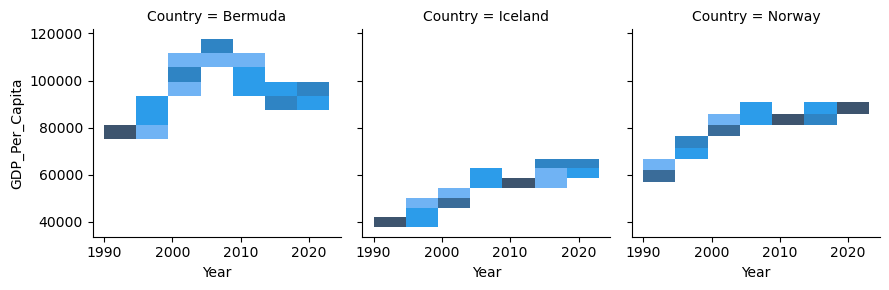

In [70]:
gdp_and_internet_top_countries = gdp_and_internet_use_2014_top_3['Country']

compare_gdp_top_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(gdp_and_internet_top_countries)]

g = sns.FacetGrid(compare_gdp_top_countries, col="Country")

g.map_dataframe(sns.histplot,"Year", "GDP_Per_Capita")

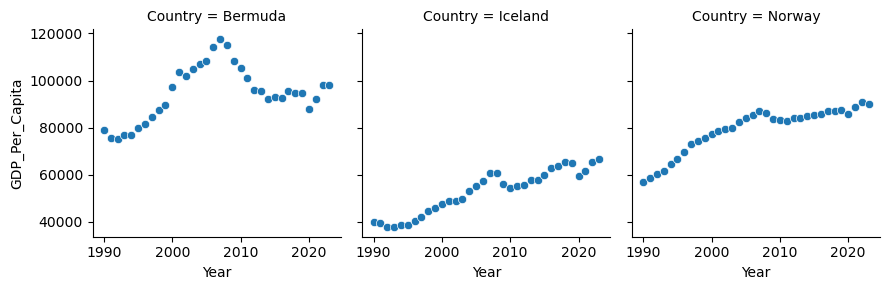

In [73]:
gdp_and_internet_top_countries = gdp_and_internet_use_2014_top_3['Country']

compare_gdp_top_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(gdp_and_internet_top_countries)]

g = sns.FacetGrid(compare_gdp_top_countries, col="Country")

g.map_dataframe(sns.scatterplot,"Year", "GDP_Per_Capita")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [71]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
15                   Afghanistan  2014     3017.942544                 7.0
49   Africa Eastern and Southern  2014     4052.851526                 NaN
83    Africa Western and Central  2014     4816.917355                 NaN
117                      Albania  2014    12788.747231                54.3
151                      Algeria  2014    15073.762940                29.5


In [72]:
print(gdp_and_internet_use_2014.tail())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
9361  West Bank and Gaza  2014     5990.426615                 NaN
9395               World  2014    17307.606891                 NaN
9424               Yemen  2014             NaN             22.5500
9455              Zambia  2014     3585.577485              6.5000
9489            Zimbabwe  2014     3360.552173             16.3647


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


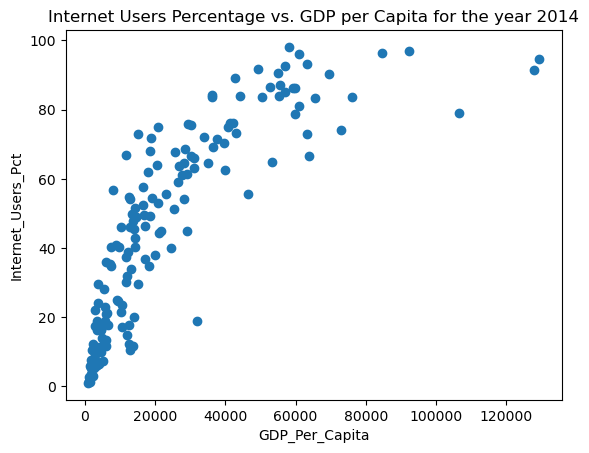

In [81]:
plt.scatter(data=gdp_and_internet_use_2014,x='GDP_Per_Capita', y='Internet_Users_Pct')

plt.title('Internet Users Percentage vs. GDP per Capita for the year 2014')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')

plt.show()

In Seaborn, most plotting functions follow the same pattern where the data argument comes first, followed by the specific column names or other plot settings. This consistency helps you quickly understand how the functions are structured.
if the data is passed first, Seaborn can handle other types of data sources more easily (e.g., working with a pandas DataFrame or a long-form data structure where each variable is a separate column).

Drop "NaN" values:

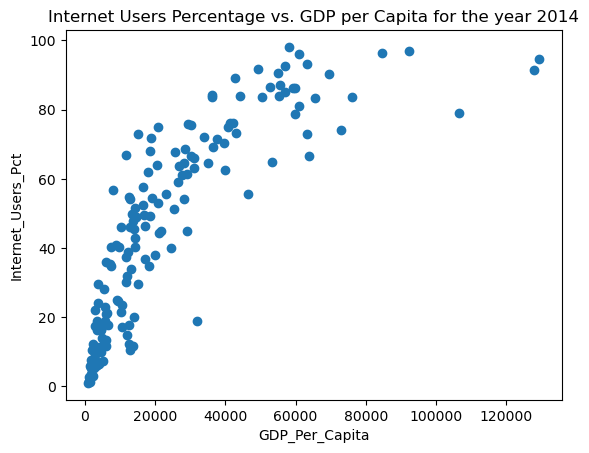

In [82]:
gdp_and_internet_use_2014_clean=gdp_and_internet_use_2014.dropna(subset=['Internet_Users_Pct', 'GDP_Per_Capita'])

plt.scatter(data=gdp_and_internet_use_2014_clean,x='GDP_Per_Capita', y='Internet_Users_Pct')

plt.title('Internet Users Percentage vs. GDP per Capita for the year 2014')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')

plt.show()


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

pd.qcut(dataframe[column to base range], 3(range or the number of buckets/categories), labels=["good", "medium", "bad"])

In [92]:
pd.qcut(gdp_and_internet_use_2014_clean['GDP_Per_Capita'], 3, labels=["Low",  "Medium", "High"])

15         Low
117     Medium
151     Medium
186       High
220     Medium
         ...  
9171       Low
9205       Low
9270    Medium
9455       Low
9489       Low
Name: GDP_Per_Capita, Length: 166, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Need to add this info to a new column on gdp_and_internet_use_2014_clean labeled GDP_group.
This allows you to add a new column:
dataframe['column']="thing you are trying to add to a new column"

In [96]:
gdp_and_internet_use_2014_clean['GDP_group']=pd.qcut(gdp_and_internet_use_2014_clean['GDP_Per_Capita'], 3, labels=["Low",  "Medium", "High"])

print(gdp_and_internet_use_2014_clean[['Country', 'GDP_Per_Capita', 'GDP_group']].head())

         Country  GDP_Per_Capita GDP_group
15   Afghanistan     3017.942544       Low
117      Albania    12788.747231    Medium
151      Algeria    15073.762940    Medium
186      Andorra    59929.244467      High
220       Angola    10250.592404    Medium


C:\Users\hanna\AppData\Local\Temp\ipykernel_16684\3002817780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014_clean['GDP_group']=pd.qcut(gdp_and_internet_use_2014_clean['GDP_Per_Capita'], 3, labels=["Low",  "Medium", "High"])


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?